In [1]:
# Importar las librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### PRE-PROCESAMIENTO

In [3]:
# Cargar el Dataframe
df_steam_games = pd.read_csv("C:/Users/Usuario/Desktop/Varios yo/SoyHenry/P1/Henry_PI1_Steam/data/steam_games_2.csv")
df_steam_games

,Unnamed: 0,app_name,release_date,price,early_access,id,developer,genre,tag,spec
0,0,Lost Summoner Kitty,2018-01-04,4.99,False,761140.0,Kotoshiro,Action,Strategy,Single-player
1,0,Lost Summoner Kitty,2018-01-04,4.99,False,761140.0,Kotoshiro,Action,Action,Single-player
2,0,Lost Summoner Kitty,2018-01-04,4.99,False,761140.0,Kotoshiro,Action,Indie,Single-player
3,0,Lost Summoner Kitty,2018-01-04,4.99,False,761140.0,Kotoshiro,Action,Casual,Single-player
4,0,Lost Summoner Kitty,2018-01-04,4.99,False,761140.0,Kotoshiro,Action,Simulation,Single-player
...,...,...,...,...,...,...,...,...,...,...
2088821,32134,Maze Run VR,NaN,4.99,True,681550.0,NaN,NaN,VR,HTC Vive
2088822,32134,Maze Run VR,NaN,4.99,True,681550.0,NaN,NaN,VR,Oculus Rift
2088823,32134,Maze Run VR,NaN,4.99,True,681550.0,NaN,NaN,VR,Tracked Motion Controllers
2088824,32134,Maze Run VR,NaN,4.99,True,681550.0,NaN,NaN,VR,Standing


In [4]:
print(df_steam_games.isna().sum())

Unnamed: 0           0
app_name             9
release_date    105531
price            68776
early_access         0
id                 201
developer        93745
genre            86886
tag                321
spec              3317
dtype: int64


In [5]:
df_steam_games['genre'].nunique()

22

In [6]:
df_steam_games['tag'].nunique()

339

Quiero llenar los nulos de la columna género con los del tag o etiqueta, pero los valores únicos de género son 22 y los de tag son 339, por lo tanto voy a rellenar los nulos de la columna género con los de la columna tag, si y solo si, el valor correspondiente de la columna tag es uno de los 22 géneros.

In [7]:
# Extraer los valores únicos de la columna 'genre'
unique_genero = df_steam_games['genre'].dropna().unique()
unique_genero

array(['Action', 'Casual', 'Indie', 'Simulation', 'Strategy',
       'Free to Play', 'RPG', 'Sports', 'Adventure', 'Racing',
       'Early Access', 'Massively Multiplayer',
       'Animation &amp; Modeling', 'Video Production', 'Utilities',
       'Web Publishing', 'Education', 'Software Training',
       'Design &amp; Illustration', 'Audio Production', 'Photo Editing',
       'Accounting'], dtype=object)

In [8]:
# Crear una función (con ayuda de copilot), que haga el relleno solo si se cumplen las dos condiciones que necesito
def fill_genre(row):
    if pd.isnull(row['genre']) and row['tag'] in unique_genero:
        return row['tag']
    else:
        return row['genre']

In [9]:
# Aplicarle la función al Dataframe
df_steam_games['genre'] = df_steam_games.apply(fill_genre, axis=1)

In [10]:
print(df_steam_games.isna().sum())

Unnamed: 0           0
app_name             9
release_date    105531
price            68776
early_access         0
id                 201
developer        93745
genre            42326
tag                321
spec              3317
dtype: int64


Se redujo a la mitad la cantidad de nulos de la columna de género.

In [11]:
# Eliminar la columna creada por no sacar el índice cuando se exportó
df_steam_games.drop("Unnamed: 0", axis=1, inplace=True)

# Eliminar la columna 'tag' por ser redundante con 'genre'
df_steam_games.drop("tag", axis=1, inplace=True)

# Eliminar la columna 'spec' porque las especificaciones no se va a tener en cuentra para el modelizado
df_steam_games.drop("spec", axis=1, inplace=True)

# Eliminar la columna 'early_acces' porque no es un parámetro que se va a tener en cuentra para el modelizado
df_steam_games.drop("early_access", axis=1, inplace=True)

In [12]:
# Eliminar valores nulos de id de juego, que son pocos y no van a permitir la unión de Dataframes
df_steam_games.dropna(subset= 'id', inplace=True)

In [13]:
# Eliminar valores duplicados
df_steam_games.drop_duplicates(inplace=True)

In [14]:
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80839 entries, 0 to 2088818
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   app_name      80837 non-null  object 
 1   release_date  72229 non-null  object 
 2   price         77219 non-null  object 
 3   id            80839 non-null  float64
 4   developer     71395 non-null  object 
 5   genre         77783 non-null  object 
dtypes: float64(1), object(5)
memory usage: 4.3+ MB


In [15]:
print(df_steam_games.isna().sum())

app_name           2
release_date    8610
price           3620
id                 0
developer       9444
genre           3056
dtype: int64


In [16]:
print(df_steam_games.isna().sum())

app_name           2
release_date    8610
price           3620
id                 0
developer       9444
genre           3056
dtype: int64


In [17]:
df_steam_games

,app_name,release_date,price,id,developer,genre
0,Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro,Action
5,Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro,Casual
10,Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro,Indie
15,Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro,Simulation
20,Lost Summoner Kitty,2018-01-04,4.99,761140.0,Kotoshiro,Strategy
...,...,...,...,...,...,...
2088786,Maze Run VR,NaN,4.99,681550.0,NaN,Adventure
2088794,Maze Run VR,NaN,4.99,681550.0,NaN,Indie
2088802,Maze Run VR,NaN,4.99,681550.0,NaN,Action
2088810,Maze Run VR,NaN,4.99,681550.0,NaN,Simulation


In [18]:
# Completar los valores faltantes para nombre del juego
df_steam_games["app_name"].fillna("sin datos", inplace=True)

In [19]:
# Completar los valores faltantes para desarrollador
df_steam_games["developer"].fillna("sin datos", inplace=True)

In [20]:
# Completar los valores faltantes para género
df_steam_games["genre"].fillna("sin especificar", inplace=True)

In [21]:
print(df_steam_games.isna().sum())

app_name           0
release_date    8610
price           3620
id                 0
developer          0
genre              0
dtype: int64


### EDA GENRE

In [22]:
df_steam_games['genre'].info()

<class 'pandas.core.series.Series'>
Index: 80839 entries, 0 to 2088818
Series name: genre
Non-Null Count  Dtype 
--------------  ----- 
80839 non-null  object
dtypes: object(1)
memory usage: 1.2+ MB


In [23]:
df_steam_games['genre'].describe()

count     80839
unique       23
top       Indie
freq      17138
Name: genre, dtype: object

In [24]:
df_steam_games['genre'].value_counts()

genre
Indie                        17138
Action                       12431
Casual                        9159
Adventure                     8855
Simulation                    7381
Strategy                      7164
RPG                           5610
sin especificar               3056
Free to Play                  2214
Early Access                  1947
Sports                        1548
Racing                        1191
Massively Multiplayer         1147
Design &amp; Illustration      460
Utilities                      425
Web Publishing                 273
Education                      192
Animation &amp; Modeling       183
Video Production               151
Software Training              118
Audio Production               110
Photo Editing                   79
Accounting                       7
Name: count, dtype: int64

### EDA FECHA DE LANZAMIENTO

In [25]:
df_steam_games['release_date'].unique()

array(['2018-01-04', '2017-07-24', '2017-12-07', ..., '2004-03-01',
       '2016-11-19', '2018-10-01'], dtype=object)

In [26]:
# Convertir la columna 'release_date' a datos de fecha con el formato 'YYYY-MM-DD'
df_steam_games['release_date'] = pd.to_datetime(df_steam_games['release_date'], format='%Y-%m-%d', errors='coerce')

In [27]:
# Extraer el año
df_steam_games['release_date'] = df_steam_games['release_date'].dt.year

In [28]:
df_steam_games['release_date'].unique()

array([2018., 2017.,   nan, 1997., 1998., 2016., 2006., 2005., 2003.,
       2007., 2002., 2000., 1995., 1996., 1994., 2001., 1993., 2004.,
       1999., 2008., 2009., 1992., 1989., 2010., 2011., 2013., 2012.,
       2014., 1983., 1984., 2015., 1990., 1988., 1991., 1985., 1982.,
       1987., 1981., 1986., 2021., 2019., 1975., 1970., 1980.])

In [29]:
print(df_steam_games.isna().sum())

app_name           0
release_date    8610
price           3620
id                 0
developer          0
genre              0
dtype: int64


(Por el momento no voy a eliminar los NaN de fecha de lanzamiento, ya que implicaría perder 8610 registros (un 10% de los datos). De ser necesario se eliminan con una línea de código en la etapa de modelo.)

In [30]:
# Contar la frecuencia de cada fecha
value_counts =df_steam_games['release_date'].value_counts()

print(value_counts)

release_date
2017.0    25318
2016.0    17935
2015.0    12465
2014.0     6475
2013.0     3111
2012.0     2185
2011.0     1050
2010.0      709
2009.0      518
2008.0      358
2018.0      316
2007.0      285
2006.0      237
2005.0      152
2003.0      129
2001.0      122
2004.0      114
1999.0       89
1998.0       89
2002.0       72
1997.0       67
2000.0       64
1996.0       61
1994.0       56
1993.0       52
1995.0       51
1992.0       26
1991.0       26
1990.0       16
1989.0       14
1988.0       11
1987.0       10
2019.0       10
1984.0        7
1983.0        6
1986.0        5
1985.0        4
1982.0        4
1981.0        3
2021.0        3
1970.0        2
1975.0        1
1980.0        1
Name: count, dtype: int64


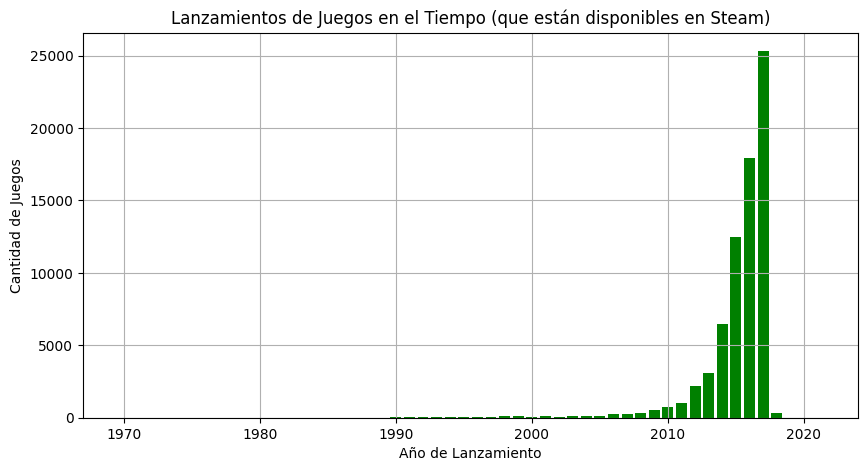

In [31]:
# Agrupar los datos por año y contar la cantidad de juegos en cada año
recuento = df_steam_games['release_date'].value_counts().sort_index()

# Crear un gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(recuento.index, recuento.values, color='green')

# Configurar etiquetas y título
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.title('Lanzamientos de Juegos en el Tiempo (que están disponibles en Steam)')

# Mostrar el gráfico
plt.grid()
plt.show()

### EDA PRECIO

In [32]:
print(df_steam_games.isna().sum())

app_name           0
release_date    8610
price           3620
id                 0
developer          0
genre              0
dtype: int64


Para el análisis de precios voy a trabajar con 2 datasets, el original para buscar relaciones entre precio y género, y uno modificado, eliminando los duplicados de la columna nombre, ya que un juego aparece varias veces en diferentes categorías y eso modifica la distribución de la variable.

In [33]:
df_precios_juegos = df_steam_games.copy()
df_precios_juegos = df_precios_juegos.drop_duplicates(subset="app_name")
df_precios_juegos

,app_name,release_date,price,id,developer,genre
0,Lost Summoner Kitty,2018.0,4.99,761140.0,Kotoshiro,Action
25,Ironbound,2018.0,Free To Play,643980.0,Secret Level SRL,Free to Play
557,Real Pool 3D - Poolians,2017.0,Free to Play,670290.0,Poolians.com,Casual
707,弹炸人2222,2017.0,0.99,767400.0,彼岸领域,Action
716,Log Challenge,NaN,2.99,773570.0,sin datos,Action
...,...,...,...,...,...,...
2088638,Colony On Mars,2018.0,1.99,773640.0,"Nikita ""Ghost_RUS""",Casual
2088670,LOGistICAL: South Africa,2018.0,4.99,733530.0,Sacada,Casual
2088715,Russian Roads,2018.0,1.99,610660.0,Laush Dmitriy Sergeevich,Indie
2088742,EXIT 2 - Directions,2017.0,4.99,658870.0,"xropi,stev3ns",Casual


In [34]:
df_precios_juegos["price"].unique()

array(['4.99', 'Free To Play', 'Free to Play', '0.99', '2.99', '3.99',
       '9.99', '18.99', '29.99', nan, 'Free', '10.99', '1.59', '14.99',
       '1.99', '59.99', '8.99', '6.99', '7.99', '39.99', '19.99', '7.49',
       '12.99', '5.99', '2.49', '15.99', '1.25', '24.99', '17.99',
       '61.99', '3.49', '11.99', '13.99', 'Free Demo', 'Play for Free!',
       '34.99', '74.76', '1.49', '32.99', '99.99', '14.95', '69.99',
       '16.99', '79.99', '49.99', '5.0', '44.99', '13.98', '29.96',
       '119.99', '109.99', '149.99', '771.71', 'Install Now', '21.99',
       '89.99', 'Play WARMACHINE: Tactics Demo', '0.98', '139.92', '4.29',
       '64.99', 'Free Mod', '54.99', '74.99', 'Install Theme', '0.89',
       'Third-party', '0.5', 'Play Now', '299.99', '1.29', '3.0', '15.0',
       '5.49', '23.99', '49.0', '20.99', '10.93', '1.39',
       'Free HITMAN™ Holiday Pack', '36.99', '4.49', '2.0', '4.0', '9.0',
       '234.99', '1.95', '1.5', '199.0', '189.0', '6.66', '27.99',
       '10.49', 

In [35]:
# Crear una lista con los valores de la columna precio
lista_precios = df_precios_juegos['price'].unique()
lista_precios

array(['4.99', 'Free To Play', 'Free to Play', '0.99', '2.99', '3.99',
       '9.99', '18.99', '29.99', nan, 'Free', '10.99', '1.59', '14.99',
       '1.99', '59.99', '8.99', '6.99', '7.99', '39.99', '19.99', '7.49',
       '12.99', '5.99', '2.49', '15.99', '1.25', '24.99', '17.99',
       '61.99', '3.49', '11.99', '13.99', 'Free Demo', 'Play for Free!',
       '34.99', '74.76', '1.49', '32.99', '99.99', '14.95', '69.99',
       '16.99', '79.99', '49.99', '5.0', '44.99', '13.98', '29.96',
       '119.99', '109.99', '149.99', '771.71', 'Install Now', '21.99',
       '89.99', 'Play WARMACHINE: Tactics Demo', '0.98', '139.92', '4.29',
       '64.99', 'Free Mod', '54.99', '74.99', 'Install Theme', '0.89',
       'Third-party', '0.5', 'Play Now', '299.99', '1.29', '3.0', '15.0',
       '5.49', '23.99', '49.0', '20.99', '10.93', '1.39',
       'Free HITMAN™ Holiday Pack', '36.99', '4.49', '2.0', '4.0', '9.0',
       '234.99', '1.95', '1.5', '199.0', '189.0', '6.66', '27.99',
       '10.49', 

In [36]:
# Convertir los precios a string
lista_precios = lista_precios.astype(str)

In [37]:
# Ordenar la lista
lista_precios.sort()

In [38]:
lista_precios

array(['0.49', '0.5', '0.89', '0.95', '0.98', '0.99', '1.0', '1.25',
       '1.29', '1.39', '1.49', '1.5', '1.59', '1.87', '1.95', '1.99',
       '10.0', '10.49', '10.93', '10.96', '10.99', '109.99', '11.15',
       '11.99', '119.99', '12.0', '12.89', '12.99', '124.99', '129.99',
       '13.37', '13.98', '13.99', '131.4', '139.92', '14.95', '14.99',
       '149.99', '15.0', '15.99', '16.06', '16.99', '160.91', '17.99',
       '172.24', '179.0', '18.9', '18.99', '189.0', '189.96', '19.29',
       '19.95', '19.98', '19.99', '199.0', '199.99', '2.0', '2.3', '2.49',
       '2.66', '2.89', '2.97', '2.99', '20.0', '20.99', '202.76', '21.99',
       '22.99', '23.96', '23.99', '234.99', '24.99', '249.99', '26.99',
       '27.49', '27.99', '289.99', '29.96', '29.99', '299.99', '3.0',
       '3.33', '3.39', '3.49', '3.99', '30.0', '31.99', '32.99', '320.0',
       '34.99', '36.99', '38.85', '39.99', '399.0', '399.99', '4.0',
       '4.29', '4.49', '4.68', '4.99', '40.0', '41.99', '42.99', '44.98

In [39]:
lista_precios.shape

(163,)

In [40]:
# Dejar en la lista los valores que no eran de tipo float
lista_precios = lista_precios[144:163]

In [41]:
lista_precios

array(['Free', 'Free Demo', 'Free HITMAN™ Holiday Pack', 'Free Mod',
       'Free Movie', 'Free To Play', 'Free to Play', 'Free to Try',
       'Free to Use', 'Install Now', 'Install Theme', 'Play Now',
       'Play WARMACHINE: Tactics Demo', 'Play for Free!', 'Play the Demo',
       'Starting at $449.00', 'Starting at $499.00', 'Third-party', 'nan'],
      dtype='<U29')

In [42]:
# Cambiar los valores tipo string por "0"
df_precios_juegos['price'].replace(lista_precios, 0, inplace=True)

In [43]:
# Cambiar los valores NaN por "0"
df_precios_juegos["price"].fillna(0, inplace=True)

In [44]:
# Retornar el tipo de dato a float
df_precios_juegos['price'] = df_precios_juegos['price'].astype(float)

In [45]:
df_precios_juegos['price'].info()

<class 'pandas.core.series.Series'>
Index: 32095 entries, 0 to 2088778
Series name: price
Non-Null Count  Dtype  
--------------  -----  
32095 non-null  float64
dtypes: float64(1)
memory usage: 501.5 KB


In [46]:
df_precios_juegos['price'].describe()

count    32095.000000
mean         8.484688
std         15.666741
min          0.000000
25%          1.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

In [47]:
print(df_precios_juegos.isna().sum())

app_name           0
release_date    2346
price              0
id                 0
developer          0
genre              0
dtype: int64


In [48]:
# Revisar los parámetros de distribución estadística de la variable precio
estadisticas = df_precios_juegos['price'].describe()
estadisticas

count    32095.000000
mean         8.484688
std         15.666741
min          0.000000
25%          1.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

In [49]:
q1 = estadisticas["25%"]
q3 = estadisticas["75%"]

In [52]:
# Identificar el límite de valores outliers
limite = q3 + 1.5 * (q3 - q1)
print(limite)

21.990000000000002


El análisis me indica que cualquier juego por encima de un precio de 22 dólares es un outlier. Voy a optar por no aplicar este criterio, ya que considero habitual que los juegos cuesten 50 o 60 dólares. Además, al aliminarlos, eliminaría los juegos más reconocidos e importantes. Voy a revisar gráficamente los precios.

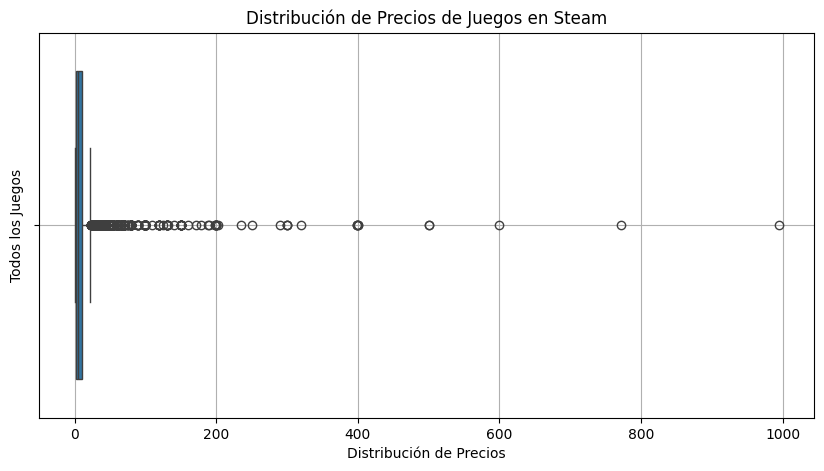

In [87]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_precios_juegos['price'])

# Configurar etiquetas y título
plt.xlabel('Distribución de Precios')
plt.ylabel('Todos los Juegos')
plt.title('Distribución de Precios de Juegos en Steam')

# Mostrar el gráfico
plt.grid()
plt.show()

Voy a situar un primer punto de corte en 200 dólares

In [88]:
df_precios_juegos.shape

(32095, 6)

In [89]:
# Eliminar los juegos con precio mayor a 200 dólares
df_precios_juegos = df_precios_juegos[df_precios_juegos['price'] <= 200]

In [90]:
df_precios_juegos.shape

(32077, 6)

Se eliminaron solo 18 registros

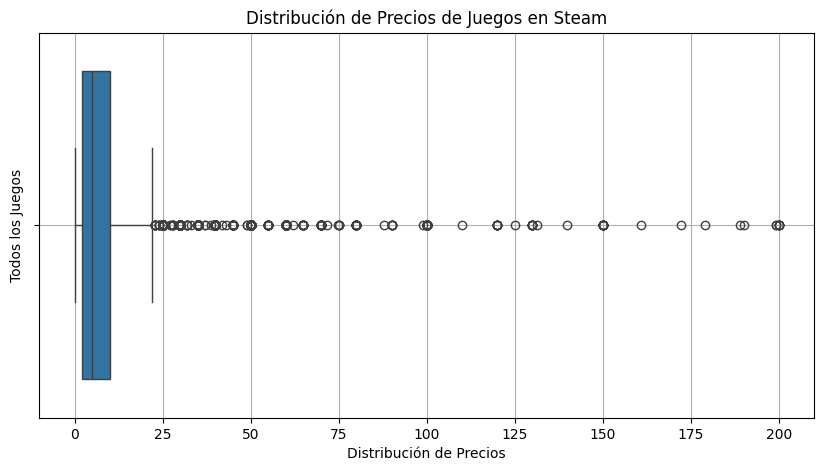

In [91]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_precios_juegos['price'])

# Configurar etiquetas y título
plt.xlabel('Distribución de Precios')
plt.ylabel('Todos los Juegos')
plt.title('Distribución de Precios de Juegos en Steam')

# Mostrar el gráfico
plt.grid()
plt.show()

Voy a realizar un último recorte a 75 dólares

In [92]:
# Eliminar los juegos con precio mayor a 75 dólares
df_precios_juegos = df_precios_juegos[df_precios_juegos['price'] <= 75]

In [93]:
df_precios_juegos.shape

(31939, 6)

Se eliminaron 138 registros más

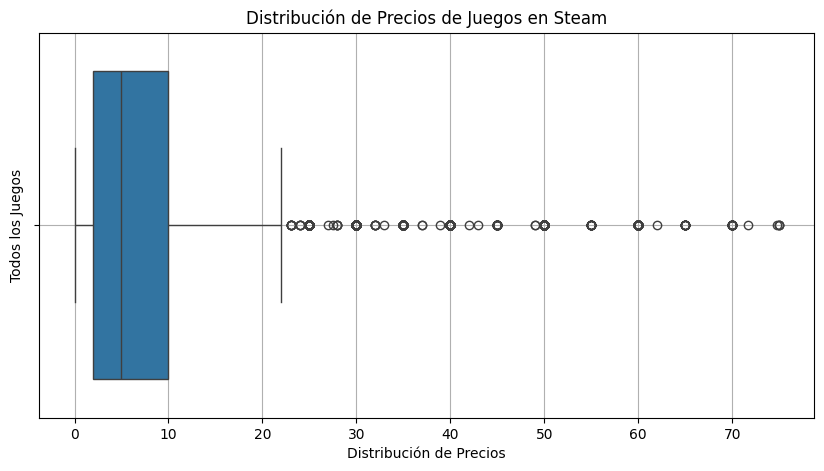

In [94]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_precios_juegos['price'])

# Configurar etiquetas y título
plt.xlabel('Distribución de Precios')
plt.ylabel('Todos los Juegos')
plt.title('Distribución de Precios de Juegos en Steam')

# Mostrar el gráfico
plt.grid()
plt.show()

Considero satisfactorio el resultado, no voy a realizar otro recorte.

Ahora voy a volver a trabajar con el Dataframe original, aplicando las modificaciones recién hechas

In [129]:
# Crear una lista con los valores de la columna precio
lista_precios = df_steam_games['price'].unique()
lista_precios

array(['4.99', 'Free To Play', 'Free to Play', '0.99', '2.99', '3.99',
       '9.99', '18.99', '29.99', nan, 'Free', '10.99', '1.59', '14.99',
       '1.99', '59.99', '8.99', '6.99', '7.99', '39.99', '19.99', '7.49',
       '12.99', '5.99', '2.49', '15.99', '1.25', '24.99', '17.99',
       '61.99', '3.49', '11.99', '13.99', 'Free Demo', 'Play for Free!',
       '34.99', '74.76', '1.49', '32.99', '99.99', '14.95', '69.99',
       '16.99', '79.99', '49.99', '5.0', '44.99', '13.98', '29.96',
       '119.99', '109.99', '149.99', '771.71', 'Install Now', '21.99',
       '89.99', 'Play WARMACHINE: Tactics Demo', '0.98', '139.92', '4.29',
       '64.99', 'Free Mod', '54.99', '74.99', 'Install Theme', '0.89',
       'Third-party', '0.5', 'Play Now', '299.99', '1.29', '3.0', '15.0',
       '5.49', '23.99', '49.0', '20.99', '10.93', '1.39',
       'Free HITMAN™ Holiday Pack', '36.99', '4.49', '2.0', '4.0', '9.0',
       '234.99', '1.95', '1.5', '199.0', '189.0', '6.66', '27.99',
       '10.49', 

In [130]:
# Convertir los precios a string
lista_precios = lista_precios.astype(str)

In [131]:
# Ordenar la lista
lista_precios.sort()

In [132]:
lista_precios

array(['0.49', '0.5', '0.89', '0.95', '0.98', '0.99', '1.0', '1.25',
       '1.29', '1.39', '1.49', '1.5', '1.59', '1.87', '1.95', '1.99',
       '10.0', '10.49', '10.93', '10.96', '10.99', '109.99', '11.15',
       '11.99', '119.99', '12.0', '12.89', '12.99', '124.99', '129.99',
       '13.37', '13.98', '13.99', '131.4', '139.92', '14.95', '14.99',
       '149.99', '15.0', '15.99', '16.06', '16.99', '160.91', '17.99',
       '172.24', '179.0', '18.9', '18.99', '189.0', '189.96', '19.29',
       '19.95', '19.98', '19.99', '199.0', '199.99', '2.0', '2.3', '2.49',
       '2.66', '2.89', '2.97', '2.99', '20.0', '20.99', '202.76', '21.99',
       '22.99', '23.96', '23.99', '234.99', '24.99', '249.99', '26.99',
       '27.49', '27.99', '289.99', '29.96', '29.99', '299.99', '3.0',
       '3.33', '3.39', '3.49', '3.99', '30.0', '31.99', '32.99', '320.0',
       '34.99', '36.99', '38.85', '39.99', '399.0', '399.99', '4.0',
       '4.29', '4.49', '4.68', '4.99', '40.0', '41.99', '42.99', '44.98

In [133]:
lista_precios.shape

(163,)

In [134]:
# Dejar en la lista los valores que no eran de tipo float
lista_precios = lista_precios[144:163]

In [135]:
lista_precios

array(['Free', 'Free Demo', 'Free HITMAN™ Holiday Pack', 'Free Mod',
       'Free Movie', 'Free To Play', 'Free to Play', 'Free to Try',
       'Free to Use', 'Install Now', 'Install Theme', 'Play Now',
       'Play WARMACHINE: Tactics Demo', 'Play for Free!', 'Play the Demo',
       'Starting at $449.00', 'Starting at $499.00', 'Third-party', 'nan'],
      dtype='<U29')

In [136]:
# Cambiar los valores tipo string por "0"
df_steam_games['price'].replace(lista_precios, 0, inplace=True)

In [137]:
# Cambiar los valores NaN por "0"
df_steam_games["price"].fillna(0, inplace=True)

In [138]:
# Retornar el tipo de dato a float
df_steam_games['price'] = df_steam_games['price'].astype(float)

In [139]:
df_steam_games['price'].info()

<class 'pandas.core.series.Series'>
Index: 80839 entries, 0 to 2088818
Series name: price
Non-Null Count  Dtype  
--------------  -----  
80839 non-null  float64
dtypes: float64(1)
memory usage: 1.2 MB


In [140]:
# Eliminar los juegos con precio mayor a 75 dólares
df_steam_games = df_steam_games[df_steam_games['price'] <= 75]

### Por último voy a analizar si hay alguna relación visible entre precio y género

In [151]:
# Revisar cuantos géneros diferentes tengo
df_steam_games['genre'].nunique()

23

In [152]:
# Revisar cuantos géneros Top
df_steam_games['genre'].value_counts()

genre
Indie                        17119
Action                       12399
Casual                        9147
Adventure                     8845
Simulation                    7366
Strategy                      7134
RPG                           5577
sin especificar               3047
Free to Play                  2165
Early Access                  1945
Sports                        1543
Racing                        1188
Massively Multiplayer         1107
Design &amp; Illustration      427
Utilities                      390
Web Publishing                 257
Education                      172
Animation &amp; Modeling       149
Video Production               131
Software Training              105
Audio Production                97
Photo Editing                   75
Accounting                       7
Name: count, dtype: int64

In [161]:
# Extraer los géneros Top para analizarlos
generos_top = df_steam_games['genre'].value_counts()
generos_top

genre
Indie                        17119
Action                       12399
Casual                        9147
Adventure                     8845
Simulation                    7366
Strategy                      7134
RPG                           5577
sin especificar               3047
Free to Play                  2165
Early Access                  1945
Sports                        1543
Racing                        1188
Massively Multiplayer         1107
Design &amp; Illustration      427
Utilities                      390
Web Publishing                 257
Education                      172
Animation &amp; Modeling       149
Video Production               131
Software Training              105
Audio Production                97
Photo Editing                   75
Accounting                       7
Name: count, dtype: int64

In [162]:
# Dejar en la lista el top 8
generos_top = generos_top[0:7]
generos_top

genre
Indie         17119
Action        12399
Casual         9147
Adventure      8845
Simulation     7366
Strategy       7134
RPG            5577
Name: count, dtype: int64

In [163]:
# Generar la lista de géneros Top
generos_top = generos_top.keys()
generos_top

Index(['Indie', 'Action', 'Casual', 'Adventure', 'Simulation', 'Strategy',
       'RPG'],
      dtype='object', name='genre')

In [164]:
df_steam_games.shape

(80392, 6)

In [165]:
df_steam_games2 = df_steam_games[df_steam_games["genre"].isin(generos_top)]
df_steam_games2

,app_name,release_date,price,id,developer,genre
0,Lost Summoner Kitty,2018.0,4.99,761140.0,Kotoshiro,Action
5,Lost Summoner Kitty,2018.0,4.99,761140.0,Kotoshiro,Casual
10,Lost Summoner Kitty,2018.0,4.99,761140.0,Kotoshiro,Indie
15,Lost Summoner Kitty,2018.0,4.99,761140.0,Kotoshiro,Simulation
20,Lost Summoner Kitty,2018.0,4.99,761140.0,Kotoshiro,Strategy
...,...,...,...,...,...,...
2088760,EXIT 2 - Directions,2017.0,4.99,658870.0,"xropi,stev3ns",Indie
2088786,Maze Run VR,NaN,4.99,681550.0,sin datos,Adventure
2088794,Maze Run VR,NaN,4.99,681550.0,sin datos,Indie
2088802,Maze Run VR,NaN,4.99,681550.0,sin datos,Action


Hay 12805 registros menos, por lo que los géneros Top 8 representan el 85% de los registros

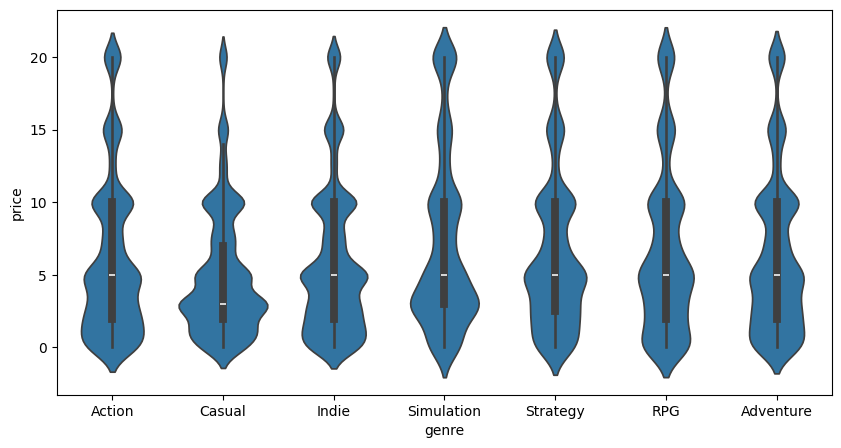

In [166]:
# Crear un gráfico de distribución para precios menores a 20 dólares
plt.figure(figsize=(10, 5))
sns.violinplot(x=df_steam_games2['genre'], y=df_steam_games2['price'][df_steam_games2["price"] < 20])
plt.show()

El análisis realizado muestra que no existe relación entre género y precio (lógicamente queda exceptuado de esta conclusión el género "Free to Play", ya que se trata de juegos gratuitos).

In [167]:
# Exportar el Dataframe a .csv eliminando el índice
df_steam_games2.to_csv("data/steam_games_3.csv", index=False)

In [2]:
# Verificar el .csv
df = pd.read_csv("data/steam_games_3.csv")
df

,app_name,release_date,price,id,developer,genre
0,Lost Summoner Kitty,2018.0,4.99,761140.0,Kotoshiro,Action
1,Lost Summoner Kitty,2018.0,4.99,761140.0,Kotoshiro,Casual
2,Lost Summoner Kitty,2018.0,4.99,761140.0,Kotoshiro,Indie
3,Lost Summoner Kitty,2018.0,4.99,761140.0,Kotoshiro,Simulation
4,Lost Summoner Kitty,2018.0,4.99,761140.0,Kotoshiro,Strategy
...,...,...,...,...,...,...
67582,EXIT 2 - Directions,2017.0,4.99,658870.0,"xropi,stev3ns",Indie
67583,Maze Run VR,NaN,4.99,681550.0,sin datos,Adventure
67584,Maze Run VR,NaN,4.99,681550.0,sin datos,Indie
67585,Maze Run VR,NaN,4.99,681550.0,sin datos,Action


### Queda como opción eliminar los duplicados de la columna app_name y los nulos de la fecha de lanzamiento, con lo que se reduciría el tamaño del dataset un 50%.